### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
fact_t1 = tienda["Precio"].sum()
fact_t2 = tienda2["Precio"].sum()
fact_t3 = tienda3["Precio"].sum()
fact_t4 = tienda4["Precio"].sum()

print("Facturación Tienda 1:", fact_t1)
print("Facturación Tienda 2:", fact_t2)
print("Facturación Tienda 3:", fact_t3)
print("Facturación Tienda 4:", fact_t4)



Facturación Tienda 1: 1150880400.0
Facturación Tienda 2: 1116343500.0
Facturación Tienda 3: 1098019600.0
Facturación Tienda 4: 1038375700.0


In [5]:
facturacion = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Facturación total": [fact_t1, fact_t2, fact_t3, fact_t4]
})

facturacion



,Tienda,Facturación total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


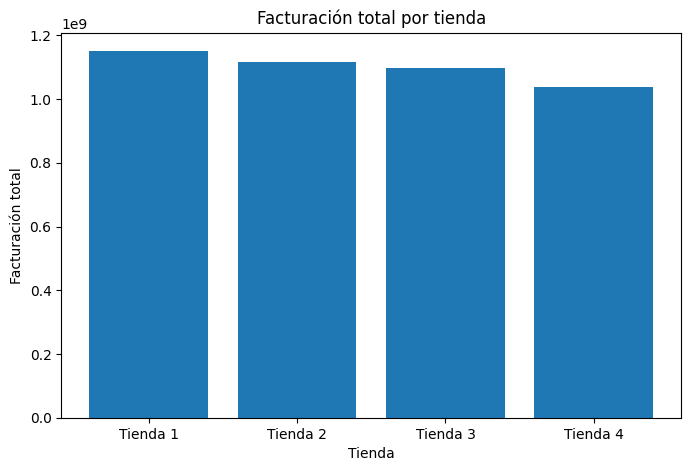

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(facturacion["Tienda"], facturacion["Facturación total"])
plt.title("Facturación total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación total")
plt.show()


# 2. Ventas por categoría

In [9]:
cat_t1 = tienda["Categoría del Producto"].value_counts()
cat_t2 = tienda2["Categoría del Producto"].value_counts()
cat_t3 = tienda3["Categoría del Producto"].value_counts()
cat_t4 = tienda4["Categoría del Producto"].value_counts()

cat_t1
cat_t2
cat_t3
cat_t4

,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [10]:
tabla_cat = pd.DataFrame({
    "Tienda 1": cat_t1,
    "Tienda 2": cat_t2,
    "Tienda 3": cat_t3,
    "Tienda 4": cat_t4
}).fillna(0).astype(int)

tabla_cat.head(10)


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


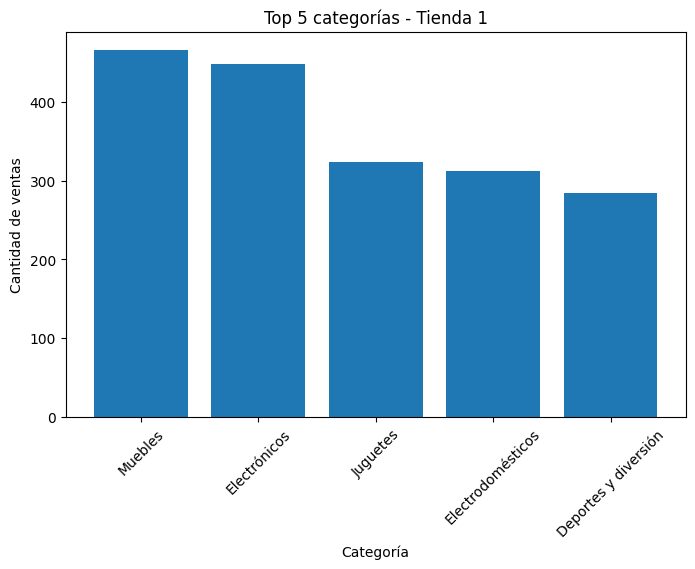

In [11]:
top5_t1 = cat_t1.head(5)

plt.figure(figsize=(8,5))
plt.bar(top5_t1.index, top5_t1.values)
plt.title("Top 5 categorías - Tienda 1")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()


# 3. Calificación promedio de la tienda


In [12]:
prom_t1 = tienda["Calificación"].mean()
prom_t2 = tienda2["Calificación"].mean()
prom_t3 = tienda3["Calificación"].mean()
prom_t4 = tienda4["Calificación"].mean()

print("Promedio Tienda 1:", prom_t1)
print("Promedio Tienda 2:", prom_t2)
print("Promedio Tienda 3:", prom_t3)
print("Promedio Tienda 4:", prom_t4)


Promedio Tienda 1: 3.976685036032217
Promedio Tienda 2: 4.037303942348453
Promedio Tienda 3: 4.048325561678677
Promedio Tienda 4: 3.9957591178965224


In [13]:
tabla_calif = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación promedio": [prom_t1, prom_t2, prom_t3, prom_t4]
})

tabla_calif


,Tienda,Calificación promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


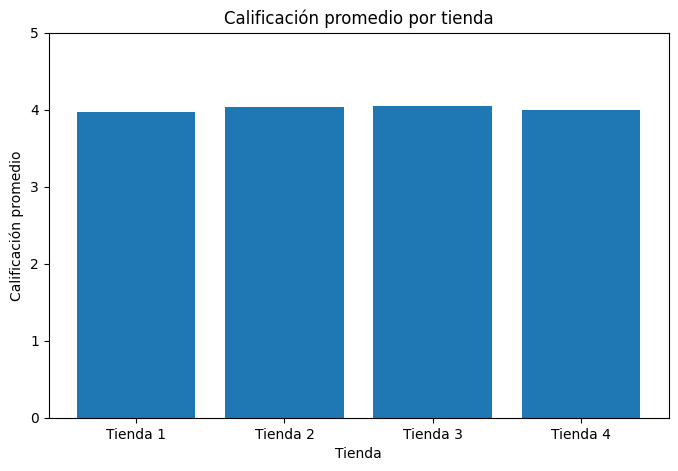

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(tabla_calif["Tienda"], tabla_calif["Calificación promedio"])
plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)  # porque la calificación normalmente va de 1 a 5
plt.show()


In [15]:
malas_t1 = (tienda["Calificación"] <= 2).sum()
malas_t2 = (tienda2["Calificación"] <= 2).sum()
malas_t3 = (tienda3["Calificación"] <= 2).sum()
malas_t4 = (tienda4["Calificación"] <= 2).sum()

tabla_malas = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Reseñas malas (<=2)": [malas_t1, malas_t2, malas_t3, malas_t4]
})

tabla_malas


,Tienda,Reseñas malas (<=2)
0,Tienda 1,405
1,Tienda 2,366
2,Tienda 3,376
3,Tienda 4,395


# 4. Productos más y menos vendidos

In [16]:
env_t1 = tienda["Costo de envío"].mean()
env_t2 = tienda2["Costo de envío"].mean()
env_t3 = tienda3["Costo de envío"].mean()
env_t4 = tienda4["Costo de envío"].mean()

print("Envío promedio Tienda 1:", env_t1)
print("Envío promedio Tienda 2:", env_t2)
print("Envío promedio Tienda 3:", env_t3)
print("Envío promedio Tienda 4:", env_t4)


Envío promedio Tienda 1: 26018.60958033065
Envío promedio Tienda 2: 25216.235693090293
Envío promedio Tienda 3: 24805.680373039424
Envío promedio Tienda 4: 23459.457167090754


In [17]:
tabla_envio = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo de envío promedio": [env_t1, env_t2, env_t3, env_t4]
})

tabla_envio


,Tienda,Costo de envío promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


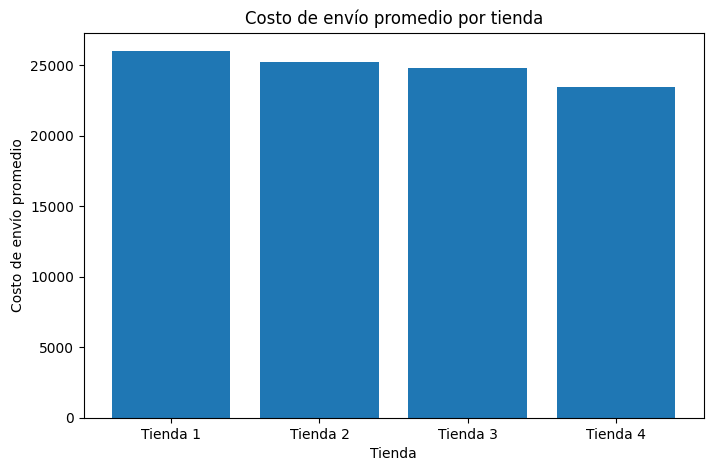

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(tabla_envio["Tienda"], tabla_envio["Costo de envío promedio"])
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")
plt.show()


# 5. Envío promedio por tienda

In [19]:
top10_t1 = tienda["Producto"].value_counts().head(10)
top10_t2 = tienda2["Producto"].value_counts().head(10)
top10_t3 = tienda3["Producto"].value_counts().head(10)
top10_t4 = tienda4["Producto"].value_counts().head(10)

print("Top 10 - Tienda 1")
display(top10_t1)

print("Top 10 - Tienda 2")
display(top10_t2)

print("Top 10 - Tienda 3")
display(top10_t3)

print("Top 10 - Tienda 4")
display(top10_t4)


Top 10 - Tienda 1


,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56
Bloques de construcción,56
Balón de baloncesto,55
Bicicleta,54
Vaso térmico,54


Top 10 - Tienda 2


,count
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58
Secadora de ropa,57
Iphone 15,55
Bloques de construcción,54
Armario,54


Top 10 - Tienda 3


,count
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55
Smart TV,54
Estufa,53
Cuerda para saltar,53
Modelado predictivo,53


Top 10 - Tienda 4


,count
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55
Mesa de comedor,55
Mesa de noche,55
Smart TV,54
Bloques de construcción,54


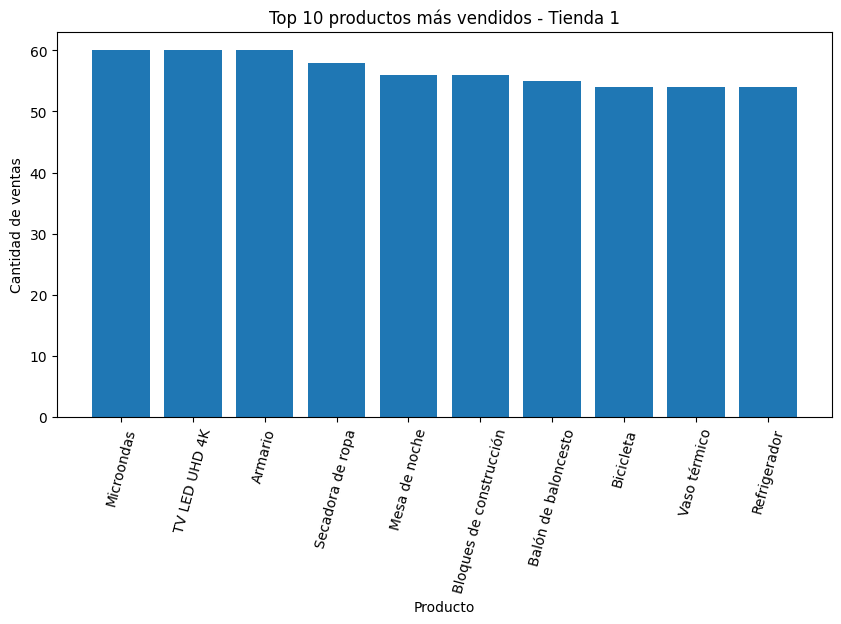

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(top10_t1.index, top10_t1.values)
plt.title("Top 10 productos más vendidos - Tienda 1")
plt.xlabel("Producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=75)
plt.show()


In [21]:
# 1) Facturación total (suma de Precio)
fact_t1 = tienda["Precio"].sum()
fact_t2 = tienda2["Precio"].sum()
fact_t3 = tienda3["Precio"].sum()
fact_t4 = tienda4["Precio"].sum()

# 2) Calificación promedio
cal_t1 = tienda["Calificación"].mean()
cal_t2 = tienda2["Calificación"].mean()
cal_t3 = tienda3["Calificación"].mean()
cal_t4 = tienda4["Calificación"].mean()

# 3) Reseñas malas (calificación <= 2)
mal_t1 = (tienda["Calificación"] <= 2).sum()
mal_t2 = (tienda2["Calificación"] <= 2).sum()
mal_t3 = (tienda3["Calificación"] <= 2).sum()
mal_t4 = (tienda4["Calificación"] <= 2).sum()

# 4) Envío promedio
env_t1 = tienda["Costo de envío"].mean()
env_t2 = tienda2["Costo de envío"].mean()
env_t3 = tienda3["Costo de envío"].mean()
env_t4 = tienda4["Costo de envío"].mean()

# 5) Ticket promedio (promedio de Precio)
ticket_t1 = tienda["Precio"].mean()
ticket_t2 = tienda2["Precio"].mean()
ticket_t3 = tienda3["Precio"].mean()
ticket_t4 = tienda4["Precio"].mean()

# Armar tabla final
resumen = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Facturación total": [fact_t1, fact_t2, fact_t3, fact_t4],
    "Ticket promedio": [ticket_t1, ticket_t2, ticket_t3, ticket_t4],
    "Calificación promedio": [cal_t1, cal_t2, cal_t3, cal_t4],
    "Reseñas malas (<=2)": [mal_t1, mal_t2, mal_t3, mal_t4],
    "Envío promedio": [env_t1, env_t2, env_t3, env_t4]
})

resumen.sort_values(by="Facturación total", ascending=False)


,Tienda,Facturación total,Ticket promedio,Calificación promedio,Reseñas malas (<=2),Envío promedio
0,Tienda 1,1.150880e+09,487867.910131,3.976685,405,26018.609580
1,Tienda 2,1.116344e+09,473227.426876,4.037304,366,25216.235693
2,Tienda 3,1.098020e+09,465459.771089,4.048326,376,24805.680373
3,Tienda 4,1.038376e+09,440362.892282,3.995759,395,23459.457167


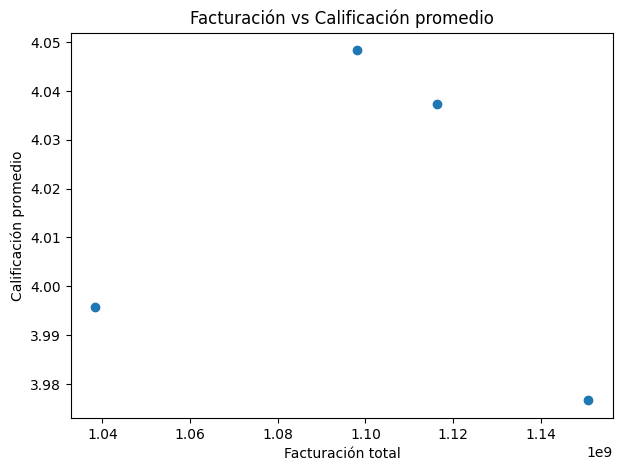

,Tienda,Facturación total,Ticket promedio,Calificación promedio,Reseñas malas (<=2),Envío promedio
0,Tienda 1,1.150880e+09,487867.910131,3.976685,405,26018.609580
1,Tienda 2,1.116344e+09,473227.426876,4.037304,366,25216.235693
2,Tienda 3,1.098020e+09,465459.771089,4.048326,376,24805.680373
3,Tienda 4,1.038376e+09,440362.892282,3.995759,395,23459.457167


In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(resumen["Facturación total"], resumen["Calificación promedio"])
plt.title("Facturación vs Calificación promedio")
plt.xlabel("Facturación total")
plt.ylabel("Calificación promedio")
plt.show()

resumen


In [23]:
tienda_a_vender = resumen.loc[resumen["Facturación total"].idxmin(), "Tienda"]
tienda_a_vender


'Tienda 4'

Se recomienda vender la Tienda 4, ya que presenta la menor facturación total y el ticket promedio más bajo en comparación con las demás tiendas. Además, su nivel de satisfacción no destaca frente a Tienda 2 y Tienda 3 (calificación promedio más alta), y mantiene una cantidad considerable de reseñas malas (≤2). Por lo tanto, en términos de rendimiento general, es la opción menos eficiente para mantener dentro de la cadena.
